# Trabalho 1

## Problema 2

In [158]:
import random
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pyscipopt import Model, quicksum

### A) Criar grafo

In [159]:
N = 10

def criaGrafo(N):
    
    
    #criar um grafo vazio
    grafo = nx.DiGraph()
    
    
    #criar nodos
    grafo.add_nodes_from(range(1,N+1))
    
    
    
    
    for i in grafo.nodes:

        #1) Adicionar uma arestas
        t=np.random.choice(grafo.nodes)
        opt=random.choice([1,2])
        if(opt>1):
            grafo.add_edge(i,t)
            grafo.add_edge(t,i)
        else:
            grafo.add_edge(i,t)


        #2) Adicionar mais arestas    
        for j in range(1, N-1):
            #prob2=(math.pow(2,-j))/2
            prob=(math.pow(2,-j))
            opt=random.choice([1,2])
            e=np.random.choice(grafo.nodes)

            if (random.random() < prob):

                if (opt<2):
                    grafo.add_edge(i,e)
                else:
                    grafo.add_edge(i,e)
                    grafo.add_edge(e,i)
    

    return(grafo)


In [160]:
 
    
def verificaLigado(graph):    
    flag = 1


    #print(nx.is_connected(graph))


    while(flag==1):


        if nx.is_strongly_connected(graph):

            flag=0
            

        else:
            graph=criaGrafo(N)
            
    return  graph

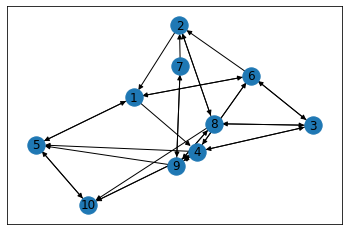

In [161]:
graph=criaGrafo(N)
grafo=verificaLigado(graph)
nx.draw_networkx(grafo)

### B) CORTE MAXIMO

O objetivo é representarmos s e w como uma matriz de incidência Aij=1 ss i pertence a Sj

In [162]:
matrizI = (nx.adjacency_matrix(grafo)).toarray()
print ("  1 2 3 4 5 6 7 8 9 10" )
print((nx.adjacency_matrix(grafo)).toarray())

  1 2 3 4 5 6 7 8 9 10
[[0 0 0 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0 1 0 0]
 [0 0 1 0 1 1 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 1 0 0 0 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 0]
 [0 0 0 1 1 0 0 0 0 0]]


Criamos um array caminhos que guarda todos os caminhos presentes no grafo entre dois vértices i e j tais que i!=j.

In [163]:
caminhos = []
for i in range(1,N+1):
    for j in range(i+1,N+1):
        for w in nx.all_simple_paths(grafo, i, j):
            caminhos.append(w)
        for w in nx.all_simple_paths(grafo, j, i):
            caminhos.append(w)
            
            
#print(caminhos)

Gera-se então o modelo cidade com as variáveis:

=> arr de dimensão igual ao número de caminhos
presentes no grafo, onde P [i] = 1, significa que o i-ésimo caminho está presente na solução.


=> mat uma matriz de dimensão L × C, sendo L o número de nodos no grafo e C o número de caminhos
presentes no grafo, onde M [i][j] = 1 significa que o vértice i está presente no j-ésimo caminho.

A seguinte função ira receber uma matriz de incidencia

In [164]:
def CorteMaxCaminhos(A): 
    x={}
    cover = Model()
    
    linhas = len(A)
    colunas = len(A[0])
    
    for i in range(linhas):
        x[i] = cover.addVar(str(i), vtype = 'B')
    
    
    for j in range(colunas):
        cover.addCons(quicksum((x[i] * A[j][i]) for i in range(linhas)) >= 1)
     
    cover.setObjective(quicksum(x.values()), sense = 'maximize')
    cover.optimize()
                      
    if cover.getStatus() == 'optimal':
        return[(j) for j in range(colunas) if cover.getVal(x[j]) == 1]

print(CorteMaxCaminhos(matrizI))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [165]:
lista_caminhos = CorteMaxCaminhos(matrizI)

Preenchemos a matriz M com os devidos valores.

Número de caminhos removidos:  2583


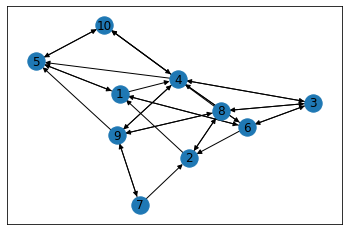

In [166]:
# desenhar o grafo optimizado

#criar um grafo vazio
grafo_optimizado = nx.DiGraph()
        
#criar nodo
grafo_optimizado.add_nodes_from(range(1, N+1))
    
n_caminhos_optimizado = 0
# adicionar todos os caminhos
for caminho in lista_caminhos:
    for i in range(N):
        if matrizI[caminho][i] == 1 and caminho != i:
            grafo_optimizado.add_path([caminho + 1, i + 1])
            #grafo_optimizado.add_path([i + 1, caminho + 1])
            n_caminhos_optimizado += 1

total_caminhos = len(caminhos)
caminhos_removidos = total_caminhos - len(lista_caminhos)
print("Número de caminhos removidos: ", caminhos_removidos)
nx.draw_networkx(grafo_optimizado)

##### 2. Criar as restrições